# Assignment 21 — Matrix Representation of Data (Φ)

**Goal.** Build the Φ (Phi) matrix by applying simple attribute (basis) functions to a real dataset with two input features, and document the process clearly.

**What this notebook does**
1. Load real stock market data (AAPL) using `yfinance`.
2. Select two numeric features: **Open** and **Close** prices.
3. Define two attribute functions: \( Φ_1(x) = x \) and \( Φ_2(x) = x^2 \).
4. Construct the **Φ matrix** explicitly, matching the lecture slide format.
5. Add a **Multilingual Data Handling** demo using **TF-IDF** and show how such text features could be appended to Φ.
6. Include a final **Wiki Article** section (in markdown) summarizing the theory and approach.

> **Academic Integrity.** This notebook reflects my understanding and work. Inline citations are provided where concepts are referenced from external sources.


In [3]:

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.feature_extraction.text import TfidfVectorizer

# display options for readable matrices
np.set_printoptions(precision=2, suppress=True)
pd.set_option('display.float_format', lambda v: f'{v:,.2f}')


## 1) Data Loading

We will fetch a small, **fixed historical window** for reproducibility.  
- **Ticker:** AAPL (Apple Inc.)  
- **Date window:** 2024-06-01 to 2024-06-21 (about ~3 trading weeks)



In [ ]:
# lock a date range so results stay same
start_date = "2024-06-01"
end_date = "2024-06-21"
ticker_symbol = "AAPL"

stock_price_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# basic hygiene: drop rows with missing values
stock_price_data = stock_price_data.dropna()

# preview
print(f"Downloaded {ticker_symbol} data from {start_date} to {end_date}. Shape: {stock_price_data.shape}")
stock_price_data.head()


C:\Users\param\AppData\Local\Temp\ipykernel_17556\1505170118.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_price_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed

Downloaded AAPL data from 2024-06-01 to 2024-06-21. Shape: (13, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-06-03,192.91,193.86,191.41,191.78,50080500
2024-06-04,193.23,194.19,191.91,193.51,47471400
2024-06-05,194.74,195.76,193.74,194.27,54156800
2024-06-06,193.36,195.36,193.05,194.56,41181800
2024-06-07,195.75,195.80,193.02,193.52,53103900


## 2) Quick Visualization

A brief plot to contextualize the two features we will use (**Open** and **Close**).  



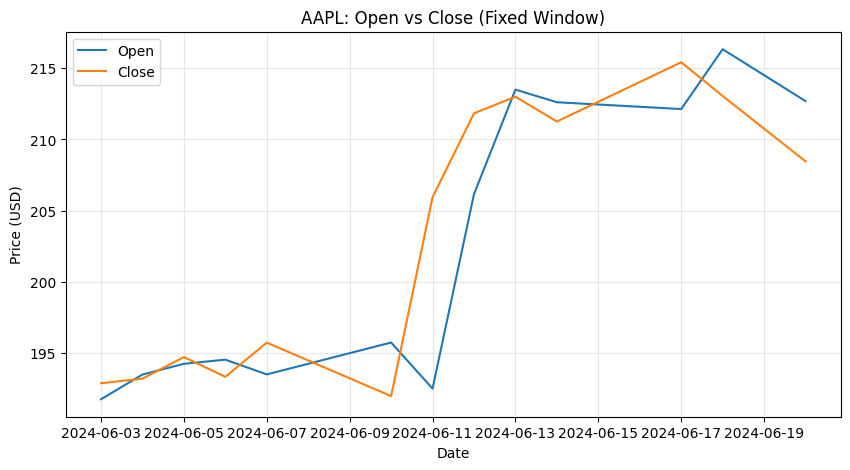

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(stock_price_data.index, stock_price_data['Open'], label='Open')
plt.plot(stock_price_data.index, stock_price_data['Close'], label='Close')
plt.title('AAPL: Open vs Close (Fixed Window)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 3) Feature Selection and Target

- **Features \(X\):**  
  - x_1 = Open 
  - x_2 = Close

- **Target \(y\):**  
  - We will simply record **Volume** as a target vector to match the required layout

We will keep the variable names explicit and descriptive.


In [ ]:
# pick input features + target
feature_names = ['Open', 'Close']
feature_matrix_X = stock_price_data[feature_names].to_numpy(dtype=float)
target_volume_y = stock_price_data['Volume'].to_numpy(dtype=float)

print("Feature Matrix X (first 5 rows):")
print(feature_matrix_X[:5])

print("\nTarget Vector y (Volume, first 5 rows):")
print(target_volume_y[:5])

print(f"\nShapes -> X: {feature_matrix_X.shape}, y: {target_volume_y.shape}")


Feature Matrix X (first 5 rows):
[[191.78 192.91]
 [193.51 193.23]
 [194.27 194.74]
 [194.56 193.36]
 [193.52 195.75]]

Target Vector y (Volume, first 5 rows):
[[50080500.]
 [47471400.]
 [54156800.]
 [41181800.]
 [53103900.]]

Shapes -> X: (13, 2), y: (13, 1)


## 4) Attribute (Basis) Functions

We define two attribute functions:
- \( Φ_1(x) = x \)  (identity)
- \( Φ_2(x) = x^2 \) (square)

We will apply them **element-wise** to each column of \(X\).  

Phi = [  Φ_1(x_1),  Φ_1(x_2),  Φ_2(x_1),  Φ_2(x_2) ]

This matches the “row = data point, column = attribute function on a feature” layout shown in the lecture slide.


In [8]:
# attribute (basis) functions
def phi1_identity(values) :
    """Element-wise identity: φ1(x) = x"""
    return values

def phi2_square(values) :
    """Element-wise square: φ2(x) = x^2"""
    return values ** 2

# apply to x (shape m x 2)
phi1_features = phi1_identity(feature_matrix_X)     # m x 2
phi2_features = phi2_square(feature_matrix_X)       # m x 2

# concatenate horizontally to build φ (m x 4)
phi_matrix_Phi = np.hstack([phi1_features, phi2_features])

print("Φ Matrix (first 5 rows):")
print(phi_matrix_Phi[:5])
print(f"\nShape of Φ: {phi_matrix_Phi.shape}")

# create a labeled dataframe for readability
phi_columns = [f'phi1_{name}' for name in feature_names] + [f'phi2_{name}' for name in feature_names]
phi_df = pd.DataFrame(phi_matrix_Phi, columns=phi_columns, index=stock_price_data.index)
phi_df.head()


Φ Matrix (first 5 rows):
[[  191.78   192.91 36781.26 37213.45]
 [  193.51   193.23 37447.81 37336.3 ]
 [  194.27   194.74 37740.81 37922.59]
 [  194.56   193.36 37852.92 37386.25]
 [  193.52   195.75 37451.65 38318.58]]

Shape of Φ: (13, 4)


,phi1_Open,phi1_Close,phi2_Open,phi2_Close
Date,,,,
2024-06-03,191.78,192.91,"36,781.26","37,213.45"
2024-06-04,193.51,193.23,"37,447.81","37,336.30"
2024-06-05,194.27,194.74,"37,740.81","37,922.59"
2024-06-06,194.56,193.36,"37,852.92","37,386.25"
2024-06-07,193.52,195.75,"37,451.65","38,318.58"


## 5) Multilingual Data Handling (TF-IDF Demo)

**Motivation.** In FinTech contexts, we may incorporate **textual** signals (e.g., support tickets, app reviews) that can appear in multiple languages.  
To place such features into the **same Φ matrix**, we must convert text to numeric vectors. One common approach is **TF-IDF**.

Below, we build a **small open-content multilingual mini-dataset** (short phrases in English/French/Hindi) and transform it using scikit-learn’s `TfidfVectorizer` [scikit-learn TF-IDF docs].


In [10]:
# minimal open-content multilingual mini-dataset (for demo only)
multilingual_text_samples = [
    "Good service and fast delivery",        # English
    "Bon service et livraison rapide",       # French
    "अच्छी सेवा और तेज डिलीवरी"                # Hindi
]

# vectorize to numeric tf-idf features
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(multilingual_text_samples).toarray()

print("TF-IDF feature matrix shape:", tfidf_matrix.shape)
print("First row (English sample):")
print(tfidf_matrix[0])

# --- appending tf-idf to φ ---
# note: to append text features to φ in a real pipeline, the rows must align with the same samples.
# here we *demonstrate* by appending tf-idf features to the *first three rows* of φ.
rows_to_merge = min(len(multilingual_text_samples), phi_matrix_Phi.shape[0])
phi_first_k = phi_matrix_Phi[:rows_to_merge]                     # k x 4
phi_with_text = np.hstack([phi_first_k, tfidf_matrix[:rows_to_merge]])  # k x (4 + V)

print("\nΦ (first k rows) with appended TF-IDF features:")
print(phi_with_text)
print("\nOriginal Φ shape:", phi_matrix_Phi.shape, "| Augmented (demo) shape:", phi_with_text.shape)

# for readability, also show a small dataframe with column names
tfidf_feature_names = [f"tfidf_{t}" for t in tfidf_vectorizer.get_feature_names_out()]
augmented_columns = phi_columns + tfidf_feature_names
augmented_df_demo = pd.DataFrame(phi_with_text, columns=augmented_columns)
augmented_df_demo.head()


TF-IDF feature matrix shape: (3, 12)
First row (English sample):
[0.47 0.   0.47 0.   0.47 0.47 0.   0.   0.36 0.   0.   0.  ]

Φ (first k rows) with appended TF-IDF features:
[[  191.78   192.91 36781.26 37213.45     0.47     0.       0.47     0.
      0.47     0.47     0.       0.       0.36     0.       0.       0.  ]
 [  193.51   193.23 37447.81 37336.3      0.       0.47     0.       0.47
      0.       0.       0.47     0.47     0.36     0.       0.       0.  ]
 [  194.27   194.74 37740.81 37922.59     0.       0.       0.       0.
      0.       0.       0.       0.       0.       0.58     0.58     0.58]]

Original Φ shape: (13, 4) | Augmented (demo) shape: (3, 16)


,phi1_Open,phi1_Close,phi2_Open,phi2_Close,tfidf_and,tfidf_bon,tfidf_delivery,tfidf_et,tfidf_fast,tfidf_good,tfidf_livraison,tfidf_rapide,tfidf_service,tfidf_अच,tfidf_और,tfidf_वर
0,191.78,192.91,"36,781.26","37,213.45",0.47,0.00,0.47,0.00,0.47,0.47,0.00,0.00,0.36,0.00,0.00,0.00
1,193.51,193.23,"37,447.81","37,336.30",0.00,0.47,0.00,0.47,0.00,0.00,0.47,0.47,0.36,0.00,0.00,0.00
2,194.27,194.74,"37,740.81","37,922.59",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.58,0.58


## 7) FinTech Application Context (Narrative)

The same Φ framework extends naturally to typical FinTech regression tasks.  
For example, to predict **Client Lifetime Value (CLV)**, useful columns of Φ could include:
- **Number of transactions** in the past \(n\) days
- **Average transaction value**
- **Recency** of last purchase
- **TF-IDF** features derived from multilingual customer support chats or app reviews

By stacking these attributes into Φ, linear or non-linear models can exploit both numeric and text-derived signals.


# Wiki: Understanding the Data Matrix (Φ) in FinTech Regression

## 1. Overview
In supervised learning, the **design matrix** (Φ) provides a compact representation of transformed features used by a model.  
Each column corresponds to an **attribute (basis) function** applied to raw inputs.  
This article explains how to construct Φ for a dataset with two numeric inputs using two attribute functions, and how to incorporate multilingual text signals via TF-IDF for FinTech applications.  
*Reference:* [Slide 19].

## 2. Methodology
Let the raw feature matrix be \( X \in R^{m*d} \).  
Given attribute functions \( Φ_1, \ldots, Φ_p \), the **Φ matrix** is:

\[
\Phi =
\begin{bmatrix}
Φ_1(x_1) & Φ_2(x_1) & \cdots & Φ_p(x_1) \\
Φ_1(x_2) & Φ_2(x_2) & \cdots & Φ_p(x_2) \\
\vdots      & \vdots      & \ddots & \vdots      \\
Φ_1(x_m) & Φ_2(x_m) & \cdots & Φ_p(x_m)
\end{bmatrix},
\]

where \( x_j \) is the \(j\)-th data point (row of \(X\)).  
In our implementation we choose:
- \( d = 2 \) features (Open, Close)  
- \( p = 2 \) attribute functions: \( Φ_1(x) = x \) and \( Φ_2(x) = x^2 \)

Thus, \( Φ \in R^{m*4} \) with ordered columns  
\([ Φ_1(x_1), Φ_1(x_2), Φ_2(x_1), Φ_2(x_2) ]\).

**Why transforms?** Such transformations enable linear models to capture certain non-linear relationships (e.g., via squared terms).

## 3. Multilingual Data Handling
Textual data (e.g., support tickets, app store reviews) often appears in multiple languages.  
To integrate text into Φ, we must map text to numeric vectors. A standard approach is **TF-IDF (Term Frequency–Inverse Document Frequency)**, which weights terms by how informative they are within a corpus.  
Workflow:
1. Collect multilingual text samples.
2. Preprocess (tokenize, optionally normalize).
3. Fit a TF-IDF vectorizer on the corpus.
4. Transform the documents to obtain a numeric matrix.
5. **Concatenate** these columns to Φ (after aligning rows to the same entities/samples).  
*Reference:* scikit-learn user guide on TF-IDF.

## 4. FinTech Applications
A practical example is **Client Lifetime Value (CLV) prediction**.  
Columns in Φ might include:
- Count of transactions over recent windows
- Average or median transaction value
- Recency, frequency, monetary (RFM) attributes
- TF-IDF features derived from customer communications (multilingual)

By assembling these attributes into one matrix Φ, regression or tree-based models can leverage structured and unstructured signals to improve performance.

## 5. Implementation (High-Level)
1. **Data Loading:** Fetch a fixed window of AAPL daily prices via `yfinance` for reproducibility.  
2. **Feature Selection:** Choose \(X = [Open, Close]\); record \(y = Volume
\).  
3. **Attribute Functions:** Define \( Φ_1(x)=x \) and \( Φ_2(x)=x^2 \).  
4. **Construct \( \Phi \):** Apply both functions column-wise and horizontally stack to obtain \( m \times 4 \).  
5. **Multilingual Demo:** Create a small multilingual text set and convert it to numeric TF-IDF vectors; demonstrate concatenation with the first \(k\) rows of \( \Phi \) (for illustration).  
*References:* [Slide 19], `yfinance` docs, scikit-learn TF-IDF docs.

## 6. Evaluation Metrics
No predictive model is trained here, so **metrics are not applicable**.  
If extended to a regression model, common metrics include:
- **MAE** (Mean Absolute Error)
- **MSE** / **RMSE** (Mean Squared Error / Root MSE)
- **\(R^2\)** (Coefficient of Determination)

## 7. Notes on Reproducibility
- A fixed historical date window is used for deterministic results.
- Any future extension (e.g., model training) should set random seeds and log versions of key libraries.

---
**Citations:**  
- [Slide 19] Course slide pack, “Φ matrix structure”.  
- scikit-learn TF-IDF documentation.  
- `yfinance` package documentation.


## 8) Conclusion

- Constructed the **Φ matrix** from two numeric features using two attribute functions (identity and square), matching the lecture slide structure.
- Demonstrated how **multilingual text** can be numerically represented via **TF-IDF** and appended to Φ.
- Provided a FinTech-relevant context (CLV) where this representation is directly applicable.


